In [ ]:
### Task 1.1 — Fill missing latitude and longitude using country average


In [4]:
# Fill missing lat/lon using country average
df['latitude'] = df['latitude'].fillna(df.groupby('country')['latitude'].transform('mean'))
df['longitude'] = df['longitude'].fillna(df.groupby('country')['longitude'].transform('mean'))

# Round to 2 decimal places
df['latitude'] = df['latitude'].round(2)
df['longitude'] = df['longitude'].round(2)


In [5]:
df.head()


,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79


In [6]:
### Task 1.2 — Filter cities with lat [40–60] and long [15–30], and find country/countries with most cities in that range



In [7]:
# Filter cities in the lat-long band
filtered_df = df[
    (df['latitude'] >= 40) & (df['latitude'] <= 60) &
    (df['longitude'] >= 15) & (df['longitude'] <= 30)
]

# Count how many cities each country has in this filtered region
country_counts = filtered_df['country'].value_counts()

# Find the maximum count value
max_count = country_counts.max()

# Get countries with that maximum number of cities
top_countries = country_counts[country_counts == max_count]

print("Countries with the most cities in lat 40–60 and long 15–30:")
print(top_countries)


Countries with the most cities in lat 40–60 and long 15–30:
country
Romania    9
Poland     9
Name: count, dtype: int64


In [8]:
### Task 1.3 — Fill missing temperature using region type average (based on EU and coastline)


In [9]:
# Step 1: Create a 'region_type' column (like 'yes_yes', 'no_no')
df['region_type'] = df['EU'].str.lower() + '_' + df['coastline'].str.lower()

# Step 2: Compute average temperature per region type
region_temp_avg = df.groupby('region_type')['temperature'].mean()

# Step 3: Define a function to fill missing temperature using region average
def fill_temperature(row):
    if pd.isna(row['temperature']):
        return region_temp_avg[row['region_type']]
    return row['temperature']

# Step 4: Apply the function
df['temperature'] = df.apply(fill_temperature, axis=1)

# Step 5: Optional — preview changes
df.head()


,city,country,population,EU,coastline,latitude,longitude,temperature,region_type
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.180000,no_yes
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.481538,no_no
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.540000,yes_no
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.910000,yes_no
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.790000,yes_no


In [10]:
### Task 1.4.1 — Bar chart showing number of cities in each region type (EU + Coastline)


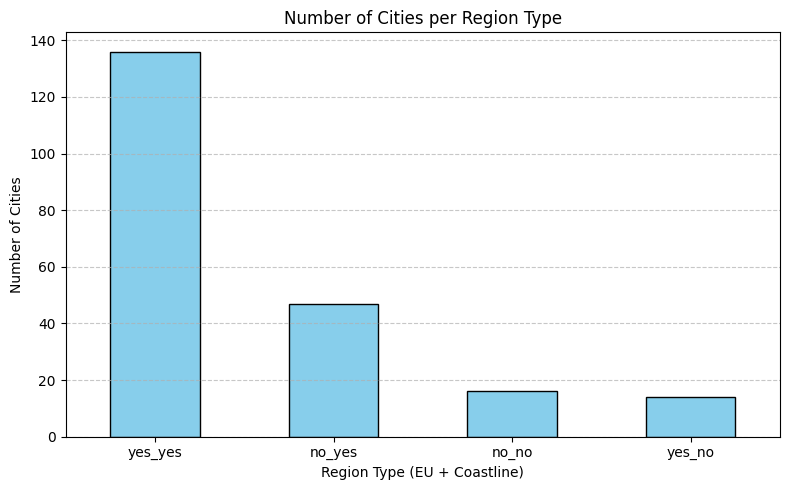

In [11]:
import matplotlib.pyplot as plt

# Count number of cities per region_type
region_counts = df['region_type'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
region_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Number of Cities per Region Type')
plt.xlabel('Region Type (EU + Coastline)')
plt.ylabel('Number of Cities')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [12]:
### Task 1.4.2 — Scatter plot of latitude (y-axis) vs longitude (x-axis), colored by country


In [ ]:
# Create a color-coded scatter plot of cities based on country
plt.figure(figsize=(10, 6))

# Use groupby to plot each country's cities with a different color
for country, group in df.groupby('country'):
    plt.scatter(group['longitude'], group['latitude'], label=country, s=25)

# Add title and labels
plt.title('City Locations: Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
### Task 1.4.3 — Histogram of population values (across all cities)


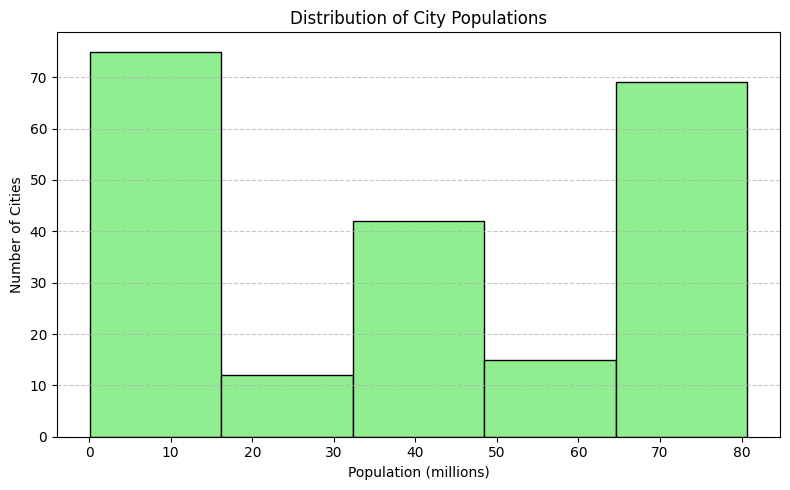

In [15]:
plt.figure(figsize=(8, 5))

# Plot histogram
plt.hist(df['population'], bins=5, edgecolor='black', color='lightgreen')

# Add title and labels
plt.title('Distribution of City Populations')
plt.xlabel('Population (millions)')
plt.ylabel('Number of Cities')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [16]:
### Task 1.4.4 — 2x2 subplots: City vs Latitude, color-coded by temperature for each region type


In [ ]:
import matplotlib.pyplot as plt

def temp_color(temp):
    if temp > 10:
        return 'red'
    elif temp < 6:
        return 'blue'
    else:
        return 'orange'

region_types = df['region_type'].unique()
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, region in enumerate(region_types):
    ax = axes[i]
    subset = df[df['region_type'] == region].reset_index(drop=True)
    n = len(subset)
    
    x_values = range(n)  # from 0 to n-1
    y_values = subset['latitude']
    colors = subset['temperature'].apply(temp_color)
    
    ax.scatter(x_values, y_values, c=colors, s=50)
    ax.set_title(f"Region: {region}")
    ax.set_xlabel("City Index")
    ax.set_ylabel("Latitude")
    
    ax.set_xticks(range(n))
    ax.tick_params(axis='x', labelrotation=90)

# Hide empty subplots if fewer than 4 region types
for j in range(i+1, 4):
    axes[j].axis('off')

plt.suptitle("Scatter Plots of Latitude vs. City Index by Region Type (Colored by Temperature)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
